In [1]:
%load_ext autoreload
%autoreload 2
%cd /mnt/activeCell-ACDC


import os, sys
sys.path.append(os.getenv("PROJECT_ROOT"))


import json
import random as rd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import cv2
import wandb
import torch
import os
import logging

from detectron2.utils.visualizer import Visualizer
from detectron2.utils.logger import setup_logger
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.modeling import build_model
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from detectron2.engine import DefaultPredictor
from detectron2.checkpoint import DetectionCheckpointer

from src.globals import *
from src.visualization.show_image import show_image
from src.register_datasets import register_datasets, get_dataset_name
from src.config_builder import get_config



from src.active_learning.al_trainer import *
from src.active_learning.mc_dropout_sampler import *




/mnt/activeCell-ACDC


/mnt/activeCell-ACDC/ac_acdc_env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def show_image_by_id(image_id, ds_json):
    image_json = tuple(filter(lambda x: x["image_id"] == image_id,  ds_json))[0]
    raw_im = cv2.imread(image_json["file_name"])
    show_image([raw_im])

In [3]:
register_datasets()
ds_json = DatasetCatalog.get(get_dataset_name(
    ACDC_LARGE, DATASETS_DSPLITS[ACDC_LARGE][0]
))

registering acdc_small dataset
registering acdc_large dataset



Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



In [4]:
running_on_server = False
print("running on server:", running_on_server)
cfg = get_config("classes_acdc_large_al")

mc_trainer = ActiveLearningTrainer(cfg, is_test_mode=not running_on_server)
rd_trainer = ActiveLearningTrainer(cfg, is_test_mode=not running_on_server)


#al_trainer.run(dataset=ACDC_LARGE, query_strat=MC_DROPOUT)
#al_trainer.run(dataset=ACDC_LARGE, query_strat=RANDOM)
wandb.init(
    project="activeCell-ACDC",
    name="",
    sync_tensorboard=True,
    mode="disabled",
)

mc_trainer.cfg.AL.DATASETS.TRAIN_UNLABELED = get_dataset_name(
    ACDC_LARGE, DATASETS_DSPLITS[ACDC_LARGE][0]
)
#rd_trainer.cfg.AL.DATASETS.TRAIN_UNLABELED = get_dataset_name(
#    ACDC_LARGE, DATASETS_DSPLITS[ACDC_LARGE][0]
#)
mc_trainer.al_dataset = ActiveLearingDataset(mc_trainer.cfg)
#rd_trainer.al_dataset = ActiveLearingDataset(rd_trainer.cfg)

mc_trainer.query_strategy = MCDropoutSampler(mc_trainer.cfg)
#rd_trainer.query_strategy = RandomSampler(rd_trainer.cfg)


logger = setup_logger(output="./log/main.log",name="null_logger") 
logger.addHandler(logging.NullHandler())
logging.getLogger('detectron2').setLevel(logging.WARNING)
logging.getLogger('detectron2').addHandler(logging.NullHandler())



Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


running on server: False
registering acdc_small dataset
registering acdc_large dataset
[01/23 12:15:31 d2.data.datasets.coco]: Loading /mnt/activeCell-ACDC/data/acdc_large/train/cell_acdc_coco_ds.json takes 7.67 seconds.
WARNING [01/23 12:15:31 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[01/23 12:15:31 d2.data.datasets.coco]: Loaded 5632 images in COCO format from /mnt/activeCell-ACDC/data/acdc_large/train/cell_acdc_coco_ds.json
update_labeled_data


['acdc_data3_Yagya_SCGE_WT_pos_5_172', 'acdc_data3_Yagya_SCGE_WT_pos_1_0', 'acdc_data3_20211029_pos_15_26', 'acdc_data3_Yagya_SCGE_WT_pos_2_143', 'acdc_data3_Yagya_SCGE_WT_pos_2_84']


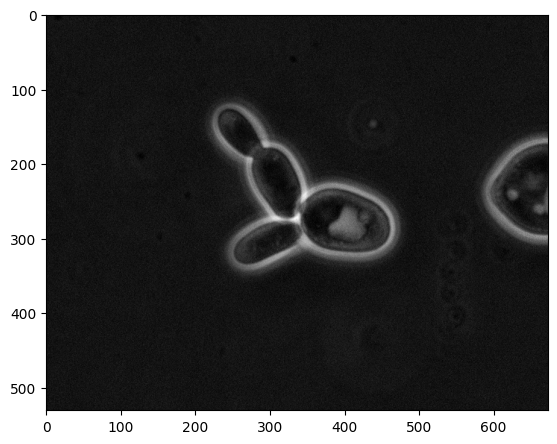

In [5]:
print(mc_trainer.al_dataset.labeled_ids)
show_image_by_id(mc_trainer.al_dataset.labeled_ids[2], ds_json)


In [6]:
i = 0

In [ ]:
mc_trainer.step(resume=(i>0))
i += 1
print(mc_trainer.al_dataset.labeled_ids)

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (12, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (12,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (3, 256, 1, 1) 

WARNING [01/23 10:40:21 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



/mnt/activeCell-ACDC/ac_acdc_env/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


WARNING [01/23 10:41:13 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

Loading and preparing results...
DONE (t=0.10s)
creating index...
index created!
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.316
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.439
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.386
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.311
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.332
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.298
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.080
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.449
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.682
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | max

In [6]:
def outputs_to_mean_img(outputs):
    masks = np.array([np.asarray(pred["instances"].pred_masks.to("cpu")) for pred in outputs])
    image_shape= masks[0][0].shape
    images = []
    for mask in masks:
        image = np.zeros(image_shape)

        for id in range(len(mask)):
            np.place(image, mask[id], 1)
        images.append(image)

    images = np.array(images)
    return images.mean(axis=0)


def outputs_to_uncertainty_map(outputs):
    masks = np.array([np.asarray(pred["instances"].pred_masks.to("cpu")) for pred in outputs])
    image_shape= masks[0][0].shape
    images = []
    for mask in masks:
        image = np.zeros(image_shape)

        for id in range(len(mask)):
            np.place(image, mask[id], 1)
        images.append(image)

    images = np.array(images)
    return 0.5 - np.abs(images.mean(axis=0) -0.5)

In [7]:
def show_uncertainty(image_id):
    image_json = tuple(filter(lambda x: x["image_id"] == image_id,  ds_json))[0]
    im = cv2.imread(image_json["file_name"])

    model = build_model(cfg)
    model = patch_module(model)
    model.eval()

    checkpointer = DetectionCheckpointer(model)
    checkpointer.load(os.path.join(cfg.OUTPUT_DIR, "best_model.pth"))
    outputs = mc_trainer.query_strategy.get_mc_dropout_samples(cfg, model, im, 10)
    show_image([im,outputs_to_mean_img(outputs)])





In [10]:
for image_id in mc_trainer.al_dataset.labeled_ids:
    print(image_id)
    show_uncertainty(image_id)
    

acdc_data3_Yagya_SCGE_WT_pos_5_172


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (10,) + inhomogeneous part.

In [37]:
def get_image_ids_by_exp(exp, image_ids):
    return list(filter(lambda x: x.find(exp) != -1, image_ids))

def get_uncertainty_for_video(video_name, aggregation="min"):


    cfg_tmp = mc_trainer.cfg
    cfg_tmp.OUTPUT_DIR = os.getenv("PROJECT_ROOT") + "/output/classes_acdc_large_al"
    cfg_tmp.AL.SAMPLE_EVERY = 4
    cfg_tmp.MODEL.ROI_BOX_HEAD.DROPOUT_PROBABILITY = 0.25
    cfg_tmp.MODEL.ROI_MASK_HEAD.DROPOUT_PROBABILITY = 0.25
    
    cfg_tmp.AL.OBJECT_TO_IMG_AGG = aggregation
    
    mc_d = MCDropoutSampler(cfg_tmp)
    mc_d.sample(cfg=cfg_tmp, ids=get_image_ids_by_exp(video_name, [image["image_id"] for image in ds_json]))
    
    with open( os.getenv("PROJECT_ROOT") + "/al_output/classes_acdc_large_al/mc_dropout/uncertainties1.json", "r") as file:
        exp_unc = json.load(file)
    
    res = []
    for image in exp_unc.keys():
        #print(int(image.split("_")[-1]), exp_unc[image])
        res.append((int(image.split("_")[-1]), exp_unc[image]))

    return  (zip(*sorted(res)))
    

aggregation: mean
WARNING [01/23 12:52:51 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

running mc dropout sampling...


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [09:52<00:00,  5.99s/it]

finished with mc dropout sampling.
min uncertainty:  0.3850580155849457 	 mean uncertainty:  0.5324408559486119 	 max uncertainty:  0.6354305148124695
worst examples: ['acdc_data3_Yagya_SCGE_WT_pos_5_45', 'acdc_data3_Yagya_SCGE_WT_pos_5_1', 'acdc_data3_Yagya_SCGE_WT_pos_5_9', 'acdc_data3_Yagya_SCGE_WT_pos_5_49', 'acdc_data3_Yagya_SCGE_WT_pos_5_97']


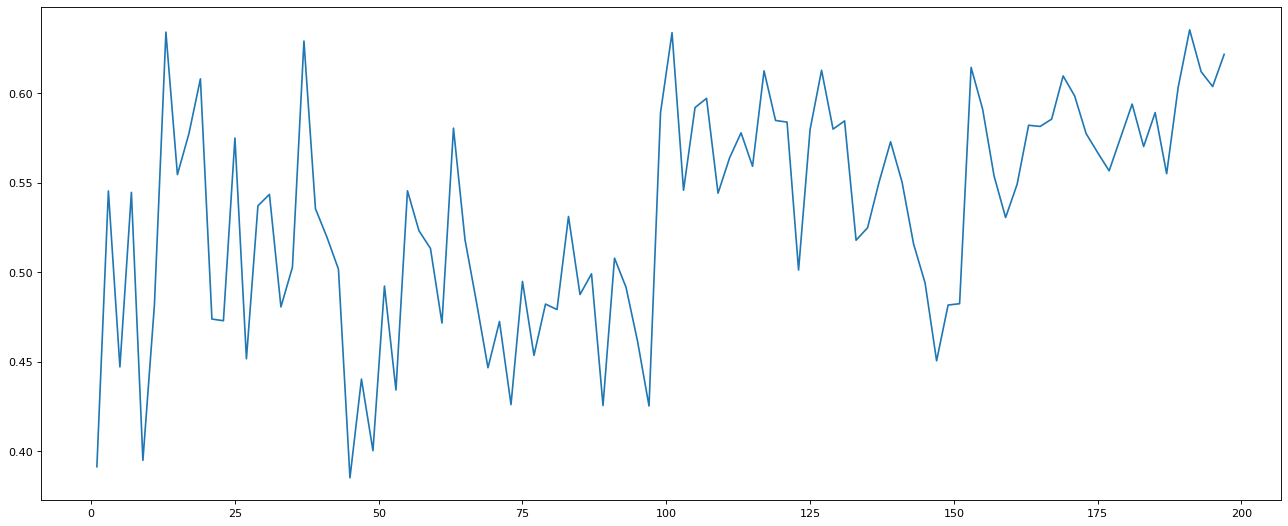

aggregation: min
WARNING [01/23 13:02:53 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

running mc dropout sampling...


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [09:54<00:00,  6.01s/it]

finished with mc dropout sampling.
min uncertainty:  0.006814714055508375 	 mean uncertainty:  0.05699241636885387 	 max uncertainty:  0.497162401676178
worst examples: ['acdc_data3_Yagya_SCGE_WT_pos_5_89', 'acdc_data3_Yagya_SCGE_WT_pos_5_95', 'acdc_data3_Yagya_SCGE_WT_pos_5_147', 'acdc_data3_Yagya_SCGE_WT_pos_5_93', 'acdc_data3_Yagya_SCGE_WT_pos_5_175']


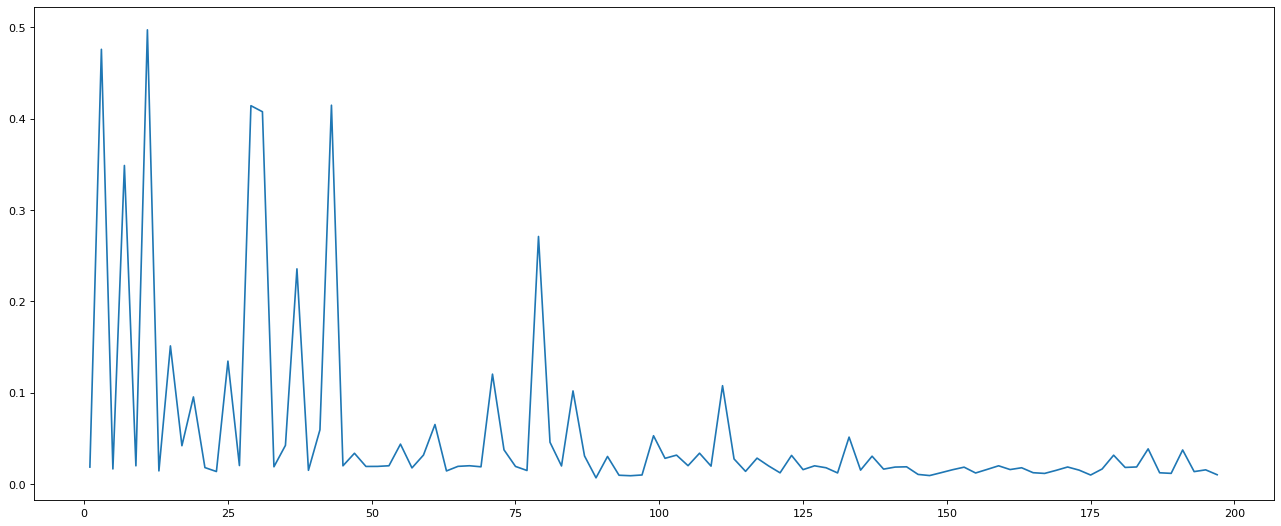

aggregation: quant20
WARNING [01/23 13:12:58 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

running mc dropout sampling...


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [10:09<00:00,  6.15s/it]

finished with mc dropout sampling.
min uncertainty:  0.0030901036225259304 	 mean uncertainty:  0.03662506164747732 	 max uncertainty:  0.10329797118902206
worst examples: ['acdc_data3_Yagya_SCGE_WT_pos_5_11', 'acdc_data3_Yagya_SCGE_WT_pos_5_3', 'acdc_data3_Yagya_SCGE_WT_pos_5_1', 'acdc_data3_Yagya_SCGE_WT_pos_5_27', 'acdc_data3_Yagya_SCGE_WT_pos_5_79']


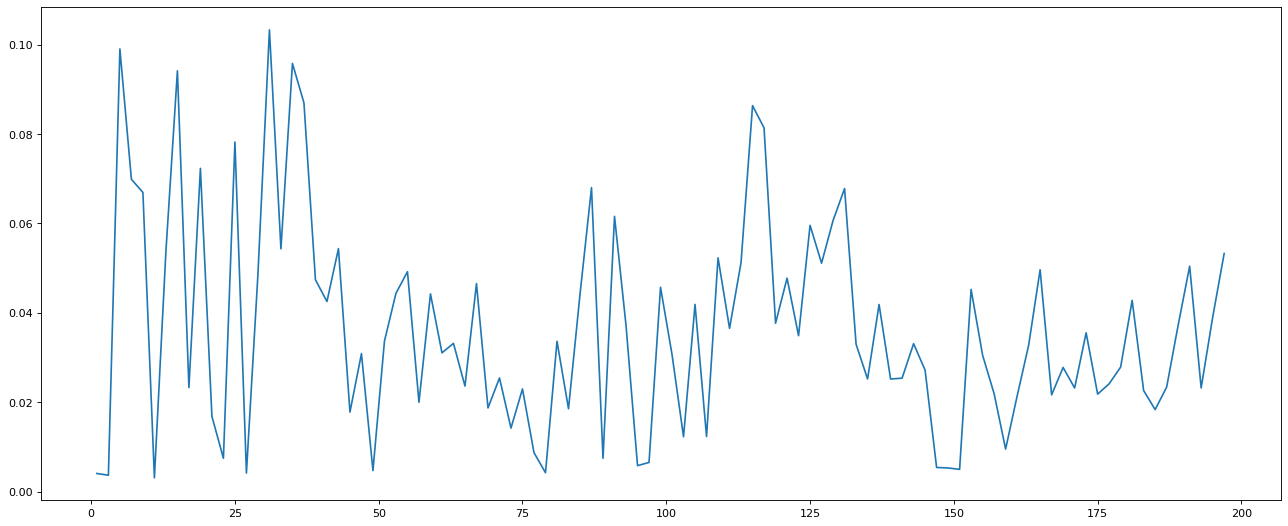

aggregation: quant10
WARNING [01/23 13:23:20 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

running mc dropout sampling...


  0%|                                                                                                        | 0/100 [00:00<?, ?it/s]


ValueError: cannot select an axis to squeeze out which has size not equal to one

In [33]:
for agg in ["mean","min","quant20","quant10"]:
    print(f"aggregation: {agg}")
    curve = get_uncertainty_for_video(video_name="acdc_data3_Yagya_SCGE_WT_pos_5", aggregation=agg)
    figure(figsize=(20, 8), dpi=80)
    plt.plot(*curve)
    plt.show()

aggregation: sum
WARNING [01/23 13:41:03 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

running mc dropout sampling...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [10:23<00:00,  6.24s/it]

finished with mc dropout sampling.
min uncertainty:  0.003192210802808404 	 mean uncertainty:  0.024838601551018656 	 max uncertainty:  0.14547936618328094
worst examples: ['acdc_data3_Yagya_SCGE_WT_pos_5_176', 'acdc_data3_Yagya_SCGE_WT_pos_5_198', 'acdc_data3_Yagya_SCGE_WT_pos_5_194', 'acdc_data3_Yagya_SCGE_WT_pos_5_150', 'acdc_data3_Yagya_SCGE_WT_pos_5_148']


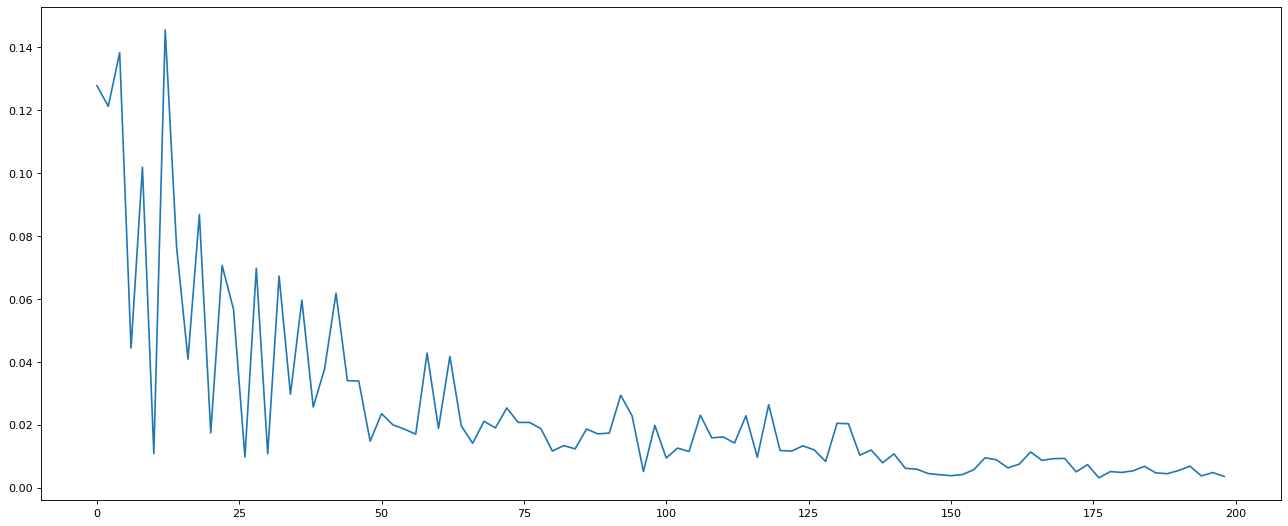

aggregation: min
WARNING [01/23 13:51:37 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

running mc dropout sampling...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [10:01<00:00,  6.02s/it]

finished with mc dropout sampling.
min uncertainty:  0.013466003350913525 	 mean uncertainty:  0.11435795227997005 	 max uncertainty:  0.5480648279190063
worst examples: ['acdc_data3_Yagya_SCGE_WT_pos_5_152', 'acdc_data3_Yagya_SCGE_WT_pos_5_90', 'acdc_data3_Yagya_SCGE_WT_pos_5_194', 'acdc_data3_Yagya_SCGE_WT_pos_5_20', 'acdc_data3_Yagya_SCGE_WT_pos_5_176']


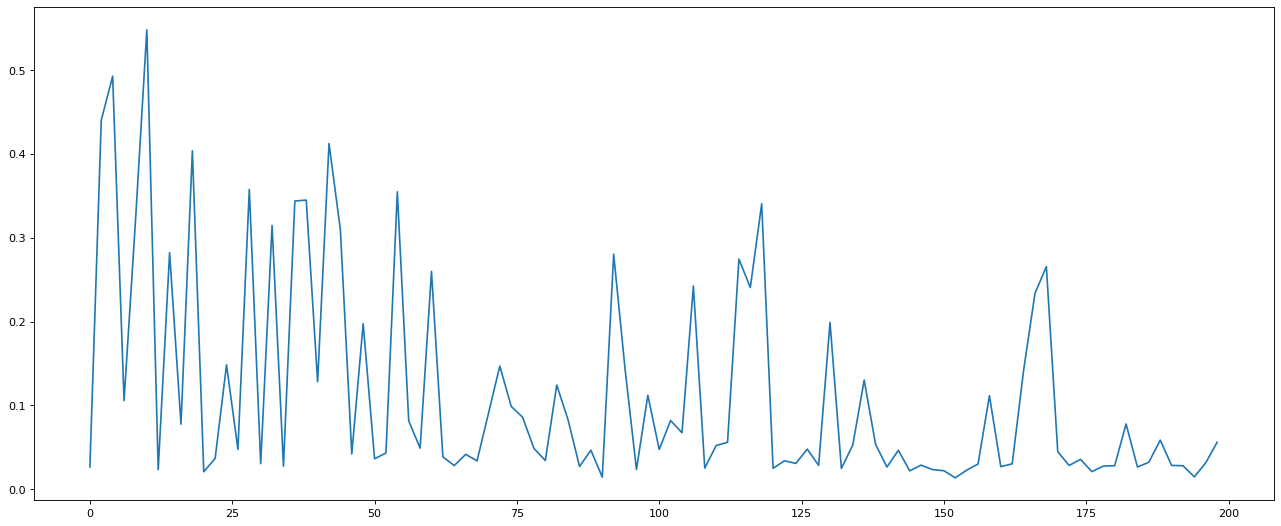

aggregation: quant20
WARNING [01/23 14:01:47 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

running mc dropout sampling...


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [09:53<00:00,  5.99s/it]

finished with mc dropout sampling.
min uncertainty:  0.006156315095722675 	 mean uncertainty:  0.047239501918242735 	 max uncertainty:  0.12096687406301498
worst examples: ['acdc_data3_Yagya_SCGE_WT_pos_5_9', 'acdc_data3_Yagya_SCGE_WT_pos_5_5', 'acdc_data3_Yagya_SCGE_WT_pos_5_39', 'acdc_data3_Yagya_SCGE_WT_pos_5_79', 'acdc_data3_Yagya_SCGE_WT_pos_5_27']


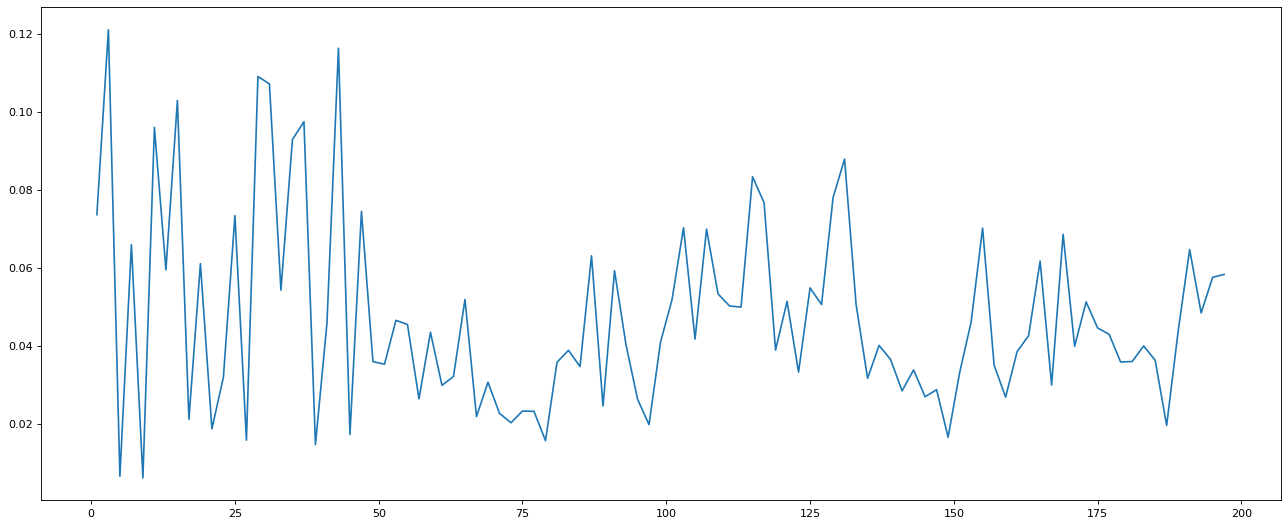

aggregation: quant10
WARNING [01/23 14:11:50 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

running mc dropout sampling...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [10:03<00:00,  6.03s/it]

finished with mc dropout sampling.
min uncertainty:  0.002679237863048911 	 mean uncertainty:  0.02207625823561102 	 max uncertainty:  0.11843056976795197
worst examples: ['acdc_data3_Yagya_SCGE_WT_pos_5_20', 'acdc_data3_Yagya_SCGE_WT_pos_5_34', 'acdc_data3_Yagya_SCGE_WT_pos_5_26', 'acdc_data3_Yagya_SCGE_WT_pos_5_28', 'acdc_data3_Yagya_SCGE_WT_pos_5_38']


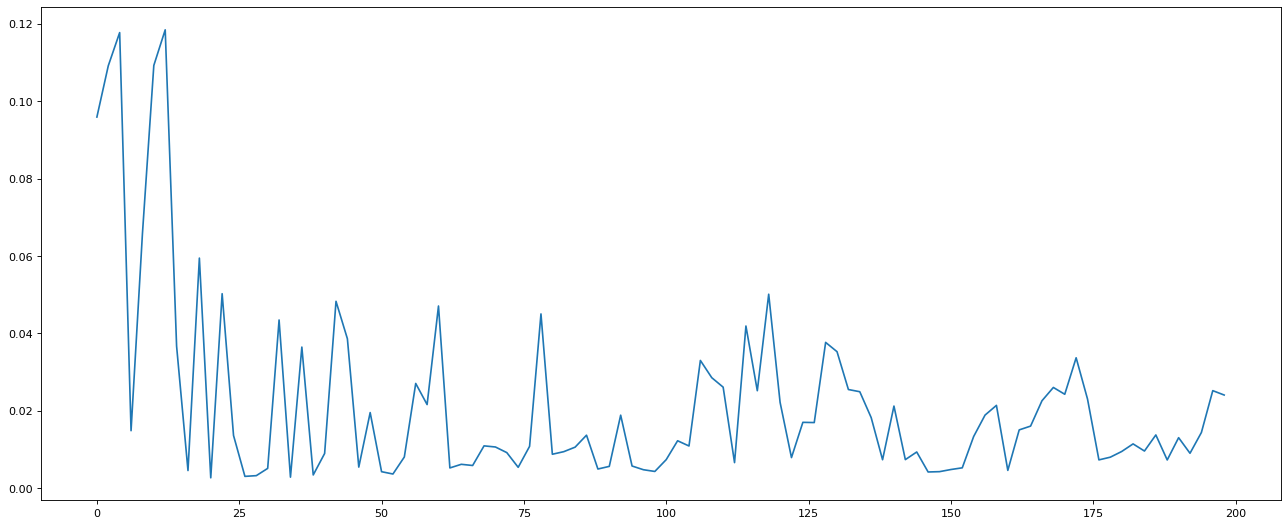

In [34]:
for agg in ["sum","min","quant20","quant10"]:
    print(f"aggregation: {agg}")
    curve = get_uncertainty_for_video(video_name="acdc_data3_Yagya_SCGE_WT_pos_5", aggregation=agg)
    figure(figsize=(20, 8), dpi=80)
    plt.plot(*curve)
    plt.show()

aggregation: logMean
WARNING [01/23 14:35:19 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

running mc dropout sampling...


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:01<00:00,  6.02s/it]

finished with mc dropout sampling.
min uncertainty:  0.15988042950630188 	 mean uncertainty:  0.38791018158197405 	 max uncertainty:  1.2420789003372192
worst examples: ['acdc_data3_Yagya_SCGE_WT_pos_5_176', 'acdc_data3_Yagya_SCGE_WT_pos_5_188', 'acdc_data3_Yagya_SCGE_WT_pos_5_184', 'acdc_data3_Yagya_SCGE_WT_pos_5_196', 'acdc_data3_Yagya_SCGE_WT_pos_5_180']


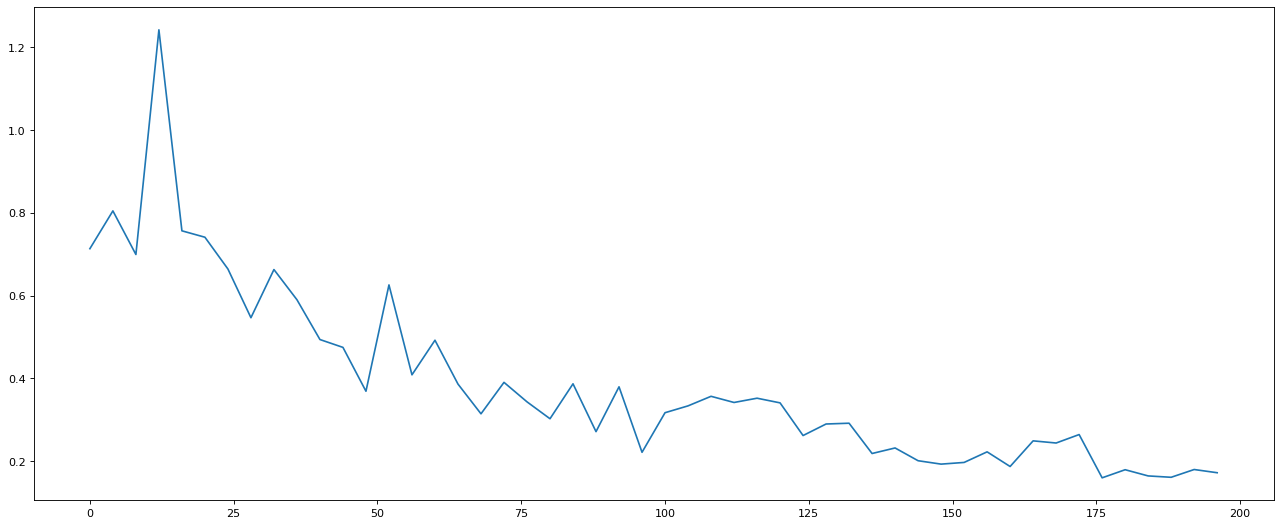

aggregation: sum50
WARNING [01/23 14:40:29 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

running mc dropout sampling...


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:57<00:00,  5.95s/it]

finished with mc dropout sampling.
min uncertainty:  0.015564842149615288 	 mean uncertainty:  0.07504027422517538 	 max uncertainty:  0.2390177994966507
worst examples: ['acdc_data3_Yagya_SCGE_WT_pos_5_196', 'acdc_data3_Yagya_SCGE_WT_pos_5_192', 'acdc_data3_Yagya_SCGE_WT_pos_5_188', 'acdc_data3_Yagya_SCGE_WT_pos_5_176', 'acdc_data3_Yagya_SCGE_WT_pos_5_184']


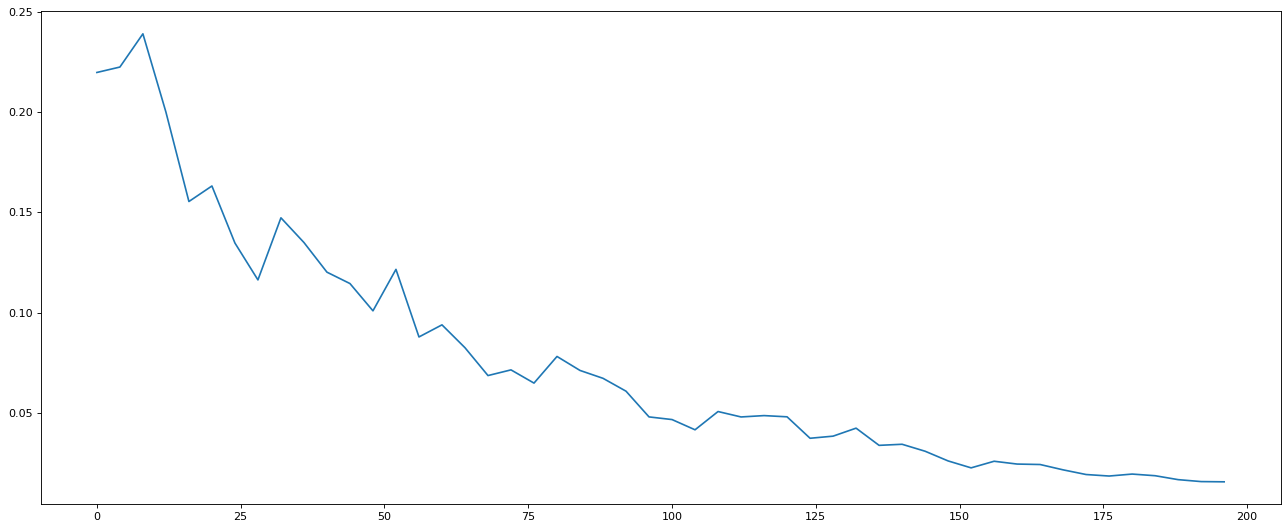

aggregation: quant20
WARNING [01/23 14:45:39 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

running mc dropout sampling...


 12%|███████████▋                                                                                     | 6/50 [00:22<02:43,  3.71s/it]


KeyboardInterrupt: 

In [38]:
for agg in ["logMean","sum50","quant20","quant10"]:
    print(f"aggregation: {agg}")
    curve = get_uncertainty_for_video(video_name="acdc_data3_Yagya_SCGE_WT_pos_5", aggregation=agg)
    figure(figsize=(20, 8), dpi=80)
    plt.plot(*curve)
    plt.show()

aggregation: mean50
WARNING [01/23 14:54:15 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

running mc dropout sampling...


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:02<00:00,  6.05s/it]

finished with mc dropout sampling.
min uncertainty:  0.025468498468399048 	 mean uncertainty:  0.11784362711012364 	 max uncertainty:  0.28600189089775085
worst examples: ['acdc_data3_Yagya_SCGE_WT_pos_5_17', 'acdc_data3_Yagya_SCGE_WT_pos_5_165', 'acdc_data3_Yagya_SCGE_WT_pos_5_101', 'acdc_data3_Yagya_SCGE_WT_pos_5_21', 'acdc_data3_Yagya_SCGE_WT_pos_5_13']


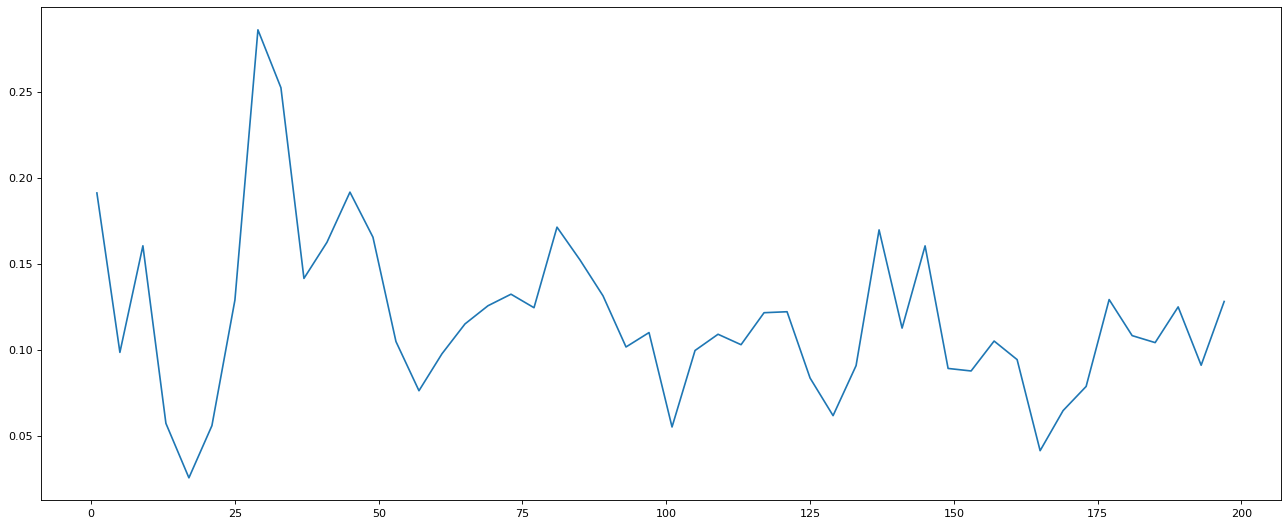

In [40]:
for agg in ["mean50"]:
    print(f"aggregation: {agg}")
    curve = get_uncertainty_for_video(video_name="acdc_data3_Yagya_SCGE_WT_pos_5", aggregation=agg)
    figure(figsize=(20, 8), dpi=80)
    plt.plot(*curve)
    plt.show()

In [9]:
def show_uncertainty_new(image_id, cfg):
    image_json = tuple(filter(lambda x: x["image_id"] == image_id,  ds_json))[0]
    im = cv2.imread(image_json["file_name"])

    model = build_model(cfg)
    model = patch_module(model)
    model.eval()

    checkpointer = DetectionCheckpointer(model)
    checkpointer.load(os.path.join(cfg.OUTPUT_DIR, "best_model.pth"))
    outputs = mc_d.get_mc_dropout_samples(cfg, model, im, 10)
    predictions = mc_d.get_observations(outputs)
    height, width = im.shape[:2]
    uncertainty = mc_d.get_uncertainty(predictions, 10, height, width)
    show_image([im,outputs_to_mean_img(outputs), outputs_to_uncertainty_map(outputs)], normalize=False)
    print("uncertainy", str(uncertainty), "self unc: ", outputs_to_uncertainty_map(outputs).sum()/(outputs_to_mean_img(outputs) == 1).sum())
    return outputs

TimeLapse_2D_MIA_KC_htb1_mCitrine_labeled_pos_4_72 68


/tmp/ipykernel_48566/2213125156.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  masks = np.array([np.asarray(pred["instances"].pred_masks.to("cpu")) for pred in outputs])
/tmp/ipykernel_48566/2213125156.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  masks = np.array([np.asarray(pred["instances"].pred_masks.to("cpu")) for pred in outputs])


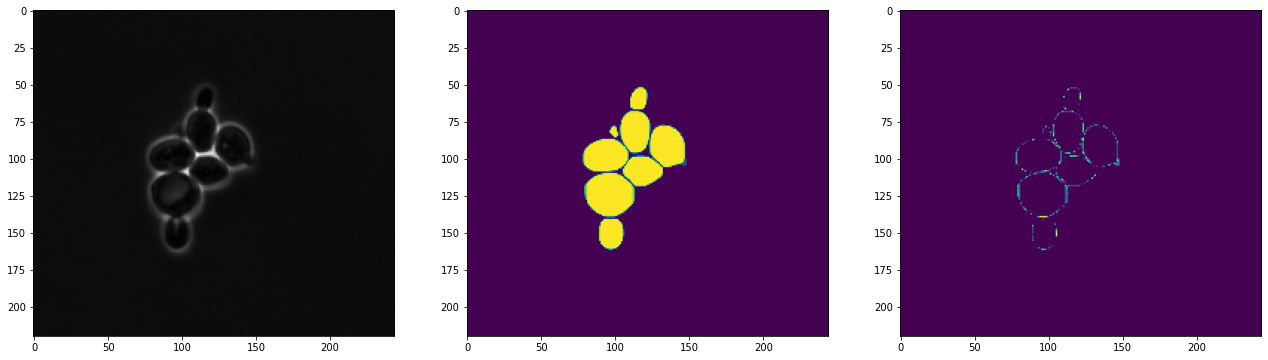

uncertainy 0.028987085 self unc:  0.025850567044696463


/tmp/ipykernel_48566/2213125156.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  masks = np.array([np.asarray(pred["instances"].pred_masks.to("cpu")) for pred in outputs])
/tmp/ipykernel_48566/2213125156.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  masks = np.array([np.asarray(pred["instances"].pred_masks.to("cpu")) for pred in outputs])


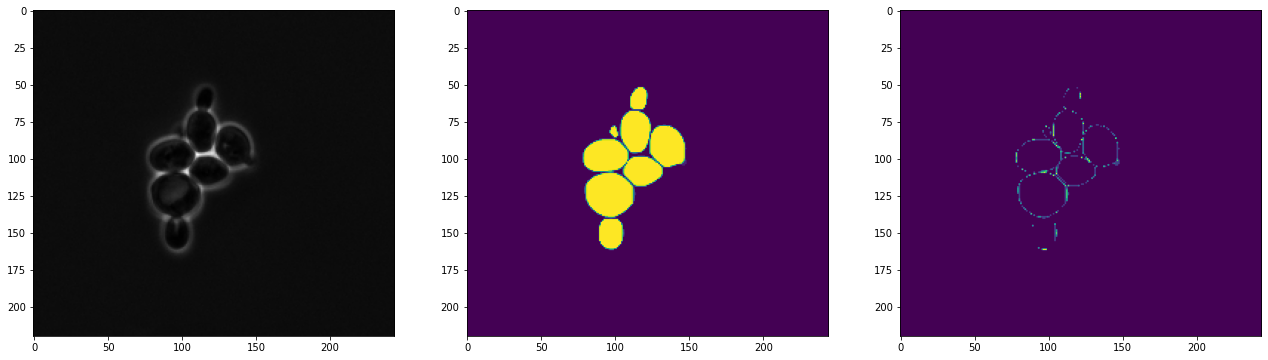

uncertainy 0.058671147 self unc:  0.023505843071786308
TimeLapse_2D_MIA_KC_htb1_mCitrine_labeled_pos_4_72 71


/tmp/ipykernel_48566/2213125156.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  masks = np.array([np.asarray(pred["instances"].pred_masks.to("cpu")) for pred in outputs])
/tmp/ipykernel_48566/2213125156.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  masks = np.array([np.asarray(pred["instances"].pred_masks.to("cpu")) for pred in outputs])


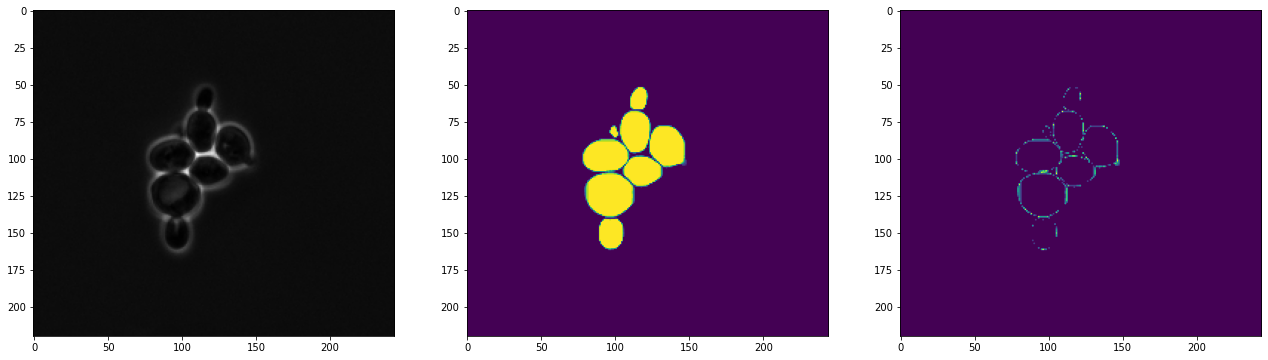

uncertainy 0.009365902 self unc:  0.029559322033898307


/tmp/ipykernel_48566/2213125156.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  masks = np.array([np.asarray(pred["instances"].pred_masks.to("cpu")) for pred in outputs])
/tmp/ipykernel_48566/2213125156.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  masks = np.array([np.asarray(pred["instances"].pred_masks.to("cpu")) for pred in outputs])


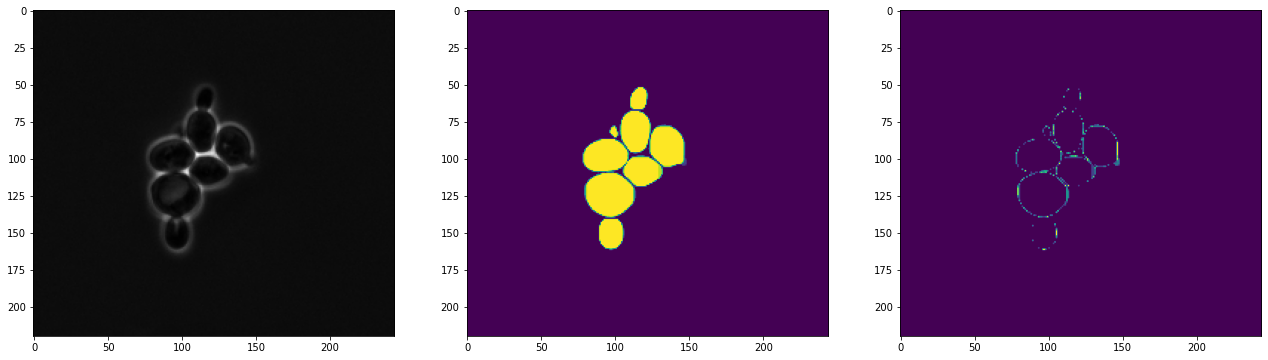

uncertainy 0.039693445 self unc:  0.027616181878970247
TimeLapse_2D_MIA_KC_htb1_mCitrine_labeled_pos_4_72 72


/tmp/ipykernel_48566/2213125156.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  masks = np.array([np.asarray(pred["instances"].pred_masks.to("cpu")) for pred in outputs])
/tmp/ipykernel_48566/2213125156.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  masks = np.array([np.asarray(pred["instances"].pred_masks.to("cpu")) for pred in outputs])


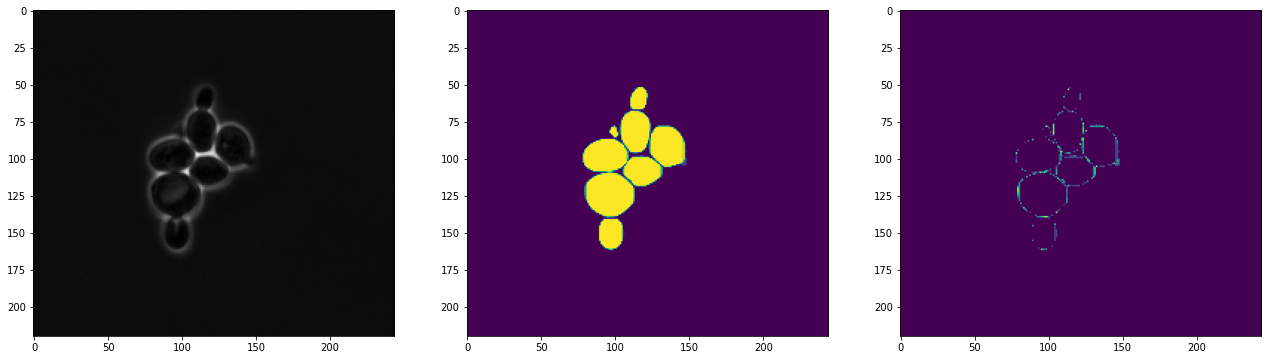

uncertainy 0.024511805 self unc:  0.02683008730691739


/tmp/ipykernel_48566/2213125156.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  masks = np.array([np.asarray(pred["instances"].pred_masks.to("cpu")) for pred in outputs])
/tmp/ipykernel_48566/2213125156.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  masks = np.array([np.asarray(pred["instances"].pred_masks.to("cpu")) for pred in outputs])


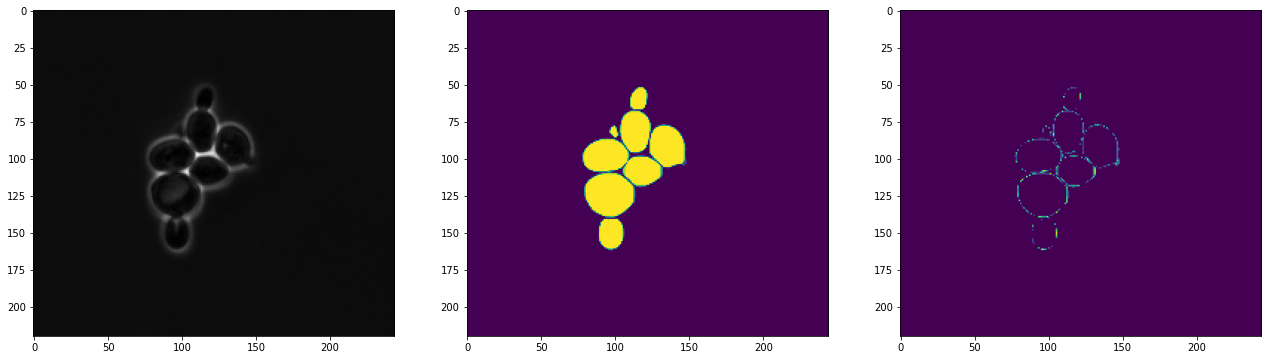

uncertainy 0.027329639 self unc:  0.02711807871914609
TimeLapse_2D_MIA_KC_htb1_mCitrine_labeled_pos_4_72 73


/tmp/ipykernel_48566/2213125156.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  masks = np.array([np.asarray(pred["instances"].pred_masks.to("cpu")) for pred in outputs])
/tmp/ipykernel_48566/2213125156.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  masks = np.array([np.asarray(pred["instances"].pred_masks.to("cpu")) for pred in outputs])


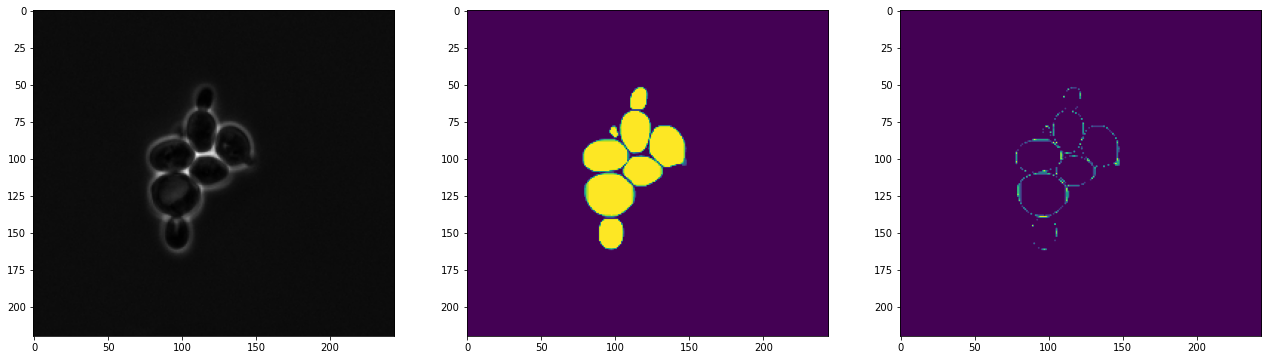

uncertainy 0.14689907 self unc:  0.030951574669827297


/tmp/ipykernel_48566/2213125156.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  masks = np.array([np.asarray(pred["instances"].pred_masks.to("cpu")) for pred in outputs])
/tmp/ipykernel_48566/2213125156.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  masks = np.array([np.asarray(pred["instances"].pred_masks.to("cpu")) for pred in outputs])


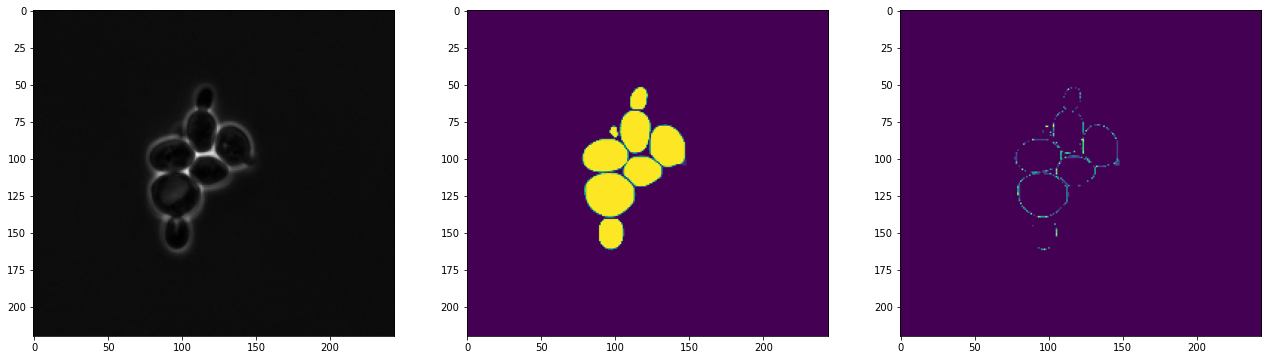

uncertainy 0.059546065 self unc:  0.02560691719321583
TimeLapse_2D_MIA_KC_htb1_mCitrine_labeled_pos_4_72 74


/tmp/ipykernel_48566/2213125156.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  masks = np.array([np.asarray(pred["instances"].pred_masks.to("cpu")) for pred in outputs])
/tmp/ipykernel_48566/2213125156.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  masks = np.array([np.asarray(pred["instances"].pred_masks.to("cpu")) for pred in outputs])


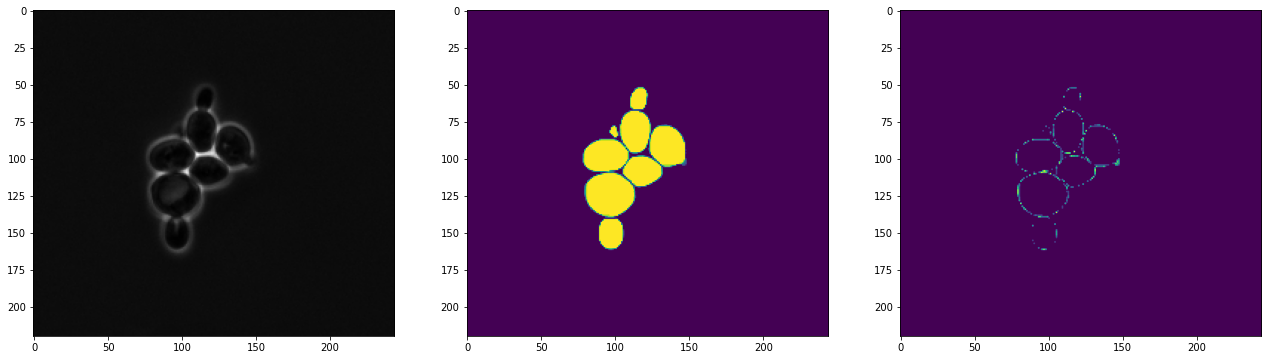

uncertainy 0.035403203 self unc:  0.025347452018530774


/tmp/ipykernel_48566/2213125156.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  masks = np.array([np.asarray(pred["instances"].pred_masks.to("cpu")) for pred in outputs])
/tmp/ipykernel_48566/2213125156.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  masks = np.array([np.asarray(pred["instances"].pred_masks.to("cpu")) for pred in outputs])


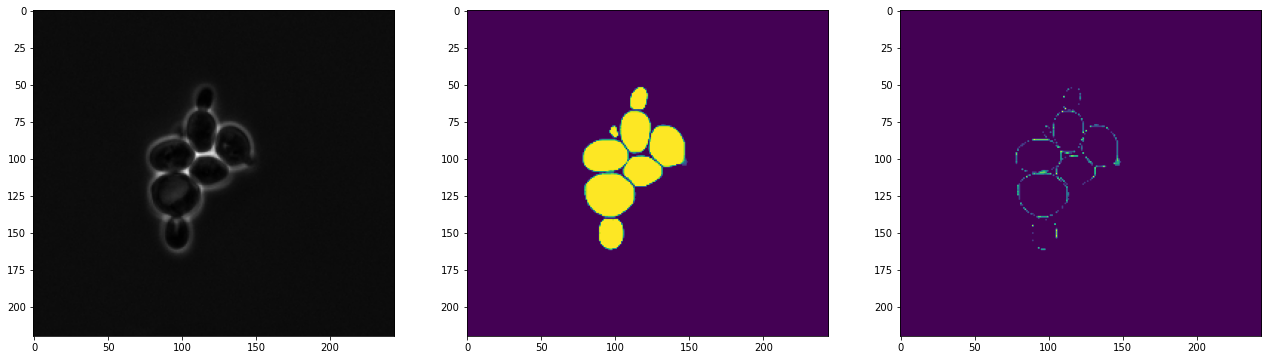

uncertainy 0.019964058 self unc:  0.027639027639027633


In [159]:
for img in [68,71, 72,73,74]:
    image_id = f"TimeLapse_2D_MIA_KC_htb1_mCitrine_labeled_pos_4_{72}"
    #image_id = "TimeLapse_2D_MIA_KC_htb1_mCitrine_labeled_pos_4_38"
    #image_id = "TimeLapse_2D_MIA_KC_htb1_mCitrine_labeled_pos_4_203"
    print(image_id,img)
    show_uncertainty_new(image_id, cfg_tmp)
    show_uncertainty_new(image_id, cfg_tmp)
    

/tmp/ipykernel_48566/2496558367.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  masks = np.array([np.asarray(pred["instances"].pred_masks.to("cpu")) for pred in outputs])
/tmp/ipykernel_48566/2496558367.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  masks = np.array([np.asarray(pred["instances"].pred_masks.to("cpu")) for pred in outputs])


14.07778930980799


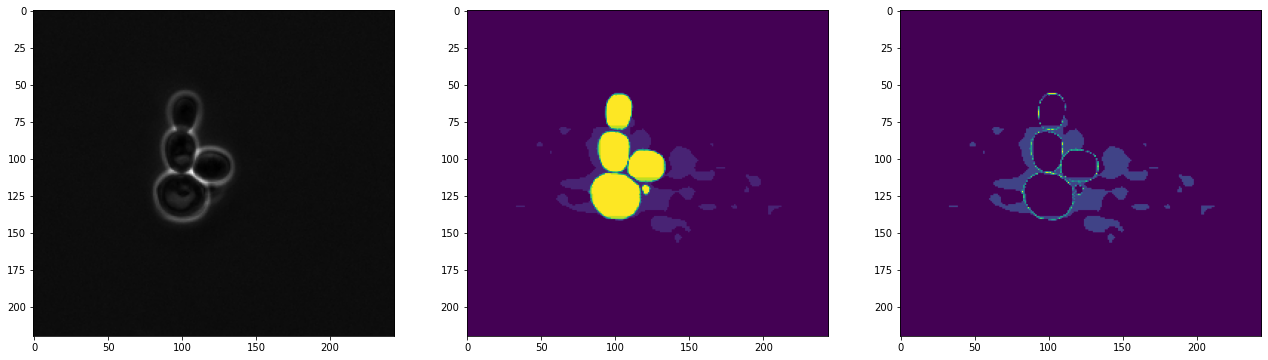

uncertainy 0.2927141


In [67]:
outputs = show_uncertainty_new(image_id, cfg_tmp)

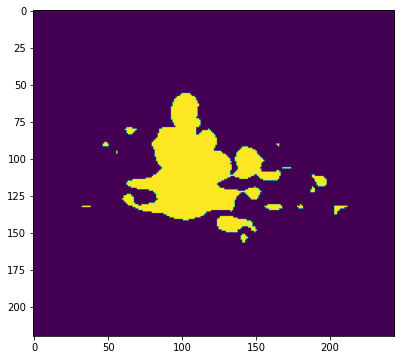

In [85]:
i = 8
show_image([outputs_to_mean_img(outputs[i:i+ 1])])

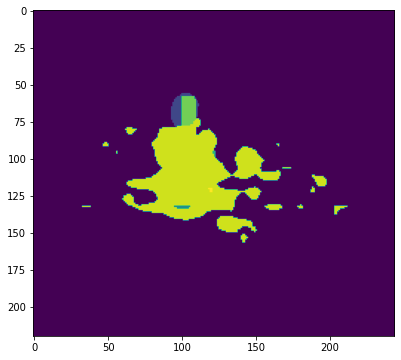

In [97]:
mask = np.array(outputs[8]["instances"].pred_masks.to("cpu"))
image_shape= mask[0].shape
image = np.zeros(image_shape)

for id in range(len(mask)):
    np.place(image, mask[id], id)
show_image([image], normalize=False)
